In [1]:
import pandas as pd
from pandas_datareader import data
import yfinance as yf
import scipy.stats as scs
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as sco
import pandas_datareader.data as pdr
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import datetime as dt

In [2]:
inicio = dt.datetime(2015,1,1)
final = dt.datetime(2024,6,1)

tickers = ['VALE3', 'B3SA3', 'CPLE6', 'NTCO3','AZUL4','PRIO3']
tickers = [acao + ".SA" for acao in tickers]
rotulos=[' Vale ',' B3 ',' COpel ',' GRUPO NATURA ',' AZUL ',' PRIO ']
precos = yf.download(tickers, inicio, final)['Adj Close']
precos

[*********************100%***********************]  6 of 6 completed


Ticker,AZUL4.SA,B3SA3.SA,CPLE6.SA,NTCO3.SA,PRIO3.SA,VALE3.SA
Date,,,,,,
2015-01-02 00:00:00+00:00,NaN,2.179236,1.658229,NaN,0.439294,11.635612
2015-01-05 00:00:00+00:00,NaN,2.119656,1.622394,NaN,0.406347,11.460635
2015-01-06 00:00:00+00:00,NaN,2.140280,1.622394,NaN,0.366411,11.919938
2015-01-07 00:00:00+00:00,NaN,2.225066,1.707318,NaN,0.365413,12.357366
2015-01-08 00:00:00+00:00,NaN,2.195276,1.691610,NaN,0.377394,12.488594
...,...,...,...,...,...,...
2024-05-24 00:00:00+00:00,10.36,10.955656,9.153641,15.44,43.450001,62.786373
2024-05-27 00:00:00+00:00,10.12,10.916319,9.153641,15.28,43.669998,62.998623
2024-05-28 00:00:00+00:00,9.63,10.886814,9.163484,14.83,43.160000,61.638309


<Axes: xlabel='Date'>

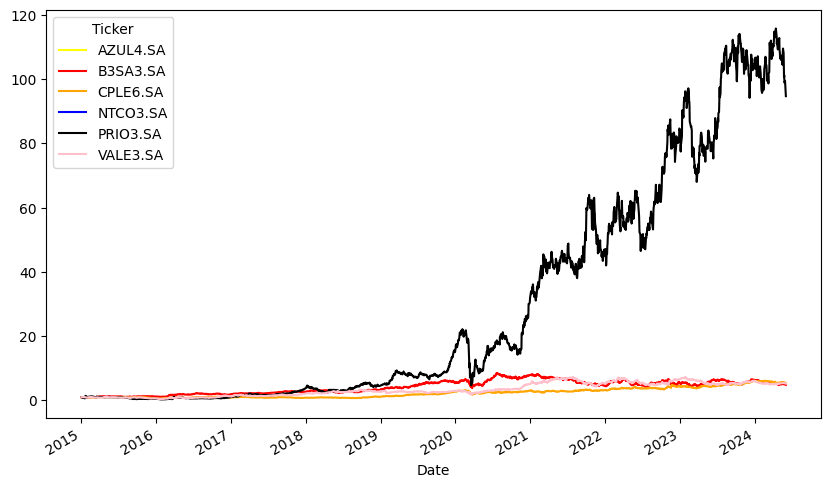

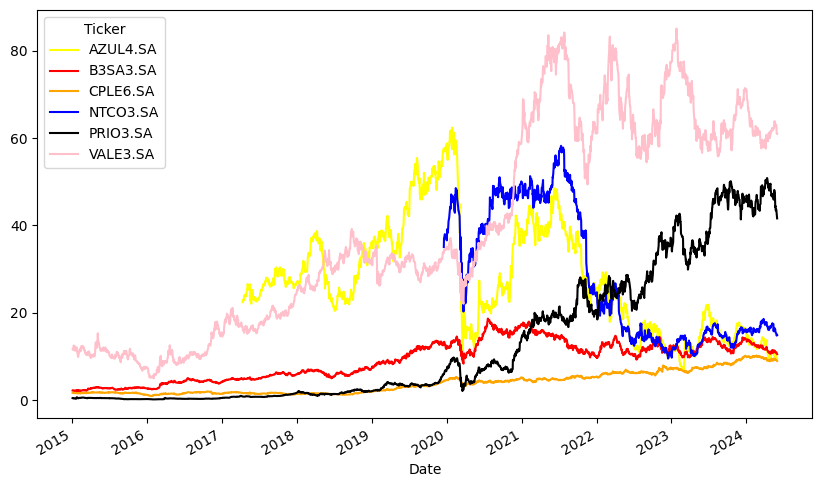

In [3]:
cores = ['yellow', 'red', 'orange', 'blue','black','pink']

(precos/precos.iloc[0]).plot(figsize=(10,6), color=cores)


precos.plot(figsize=(10,6), color=cores)

In [4]:
retornos=precos.pct_change()
retornos=retornos.dropna()
retornos

Ticker,AZUL4.SA,B3SA3.SA,CPLE6.SA,NTCO3.SA,PRIO3.SA,VALE3.SA
Date,,,,,,
2019-12-19 00:00:00+00:00,0.001736,0.000000,0.035940,0.056855,0.012829,0.009912
2019-12-20 00:00:00+00:00,-0.012303,0.011120,0.013935,0.004891,0.030333,0.014630
2019-12-23 00:00:00+00:00,0.010526,-0.045418,-0.007015,0.020748,0.077321,-0.003833
2019-12-26 00:00:00+00:00,-0.009201,-0.004694,-0.000196,-0.010289,0.031231,0.003848
2019-12-27 00:00:00+00:00,0.012791,-0.052304,0.008224,-0.014051,-0.012813,0.004204
...,...,...,...,...,...,...
2024-05-24 00:00:00+00:00,0.051777,0.002700,-0.010638,-0.009622,-0.022937,0.000461
2024-05-27 00:00:00+00:00,-0.023166,-0.003591,0.000000,-0.010363,0.005063,0.003381
2024-05-28 00:00:00+00:00,-0.048419,-0.002703,0.001075,-0.029450,-0.011678,-0.021593


In [5]:
media_retornos = retornos.mean()
media_retornos*252

Ticker
AZUL4.SA   -0.098812
B3SA3.SA    0.040075
CPLE6.SA    0.231777
NTCO3.SA   -0.041094
PRIO3.SA    0.665092
VALE3.SA    0.210423
dtype: float64

In [6]:
##Estimar assimetria:

desvios=retornos-retornos.mean()
desvio_padrao=retornos.std()
desvio_padrao_anualizado=desvio_padrao*np.sqrt(252)
print(desvio_padrao_anualizado)


Ticker
AZUL4.SA    0.786957
B3SA3.SA    0.428411
CPLE6.SA    0.356183
NTCO3.SA    0.553429
PRIO3.SA    0.655033
VALE3.SA    0.389001
dtype: float64


In [7]:
## Estimativa Descritiva:
stat=scs.describe(retornos)
Coluna=rotulos
Linhas=['Minimo', 'Maximo', 'Media', 'Variancia', 'Desvio-Padrao']
minimo=stat[1][0]
maximo=stat[1][1]
media=stat[2]*252
variancia=stat[3]
desvio_padrao=variancia**(1/2)*np.sqrt(252)
estatistica=[minimo, maximo, media, variancia, desvio_padrao]
df=pd.DataFrame(data=estatistica, index=Linhas, columns=Coluna)
df

,Vale,B3,COpel,GRUPO NATURA,AZUL,PRIO
Minimo,-0.368677,-0.161204,-0.154991,-0.242424,-0.365406,-0.151984
Maximo,0.379834,0.192446,0.220670,0.171765,0.322877,0.213579
Media,-0.098812,0.040075,0.231777,-0.041094,0.665092,0.210423
Variancia,0.002458,0.000728,0.000503,0.001215,0.001703,0.000600
Desvio-Padrao,0.786957,0.428411,0.356183,0.553429,0.655033,0.389001


<Axes: xlabel='Date'>

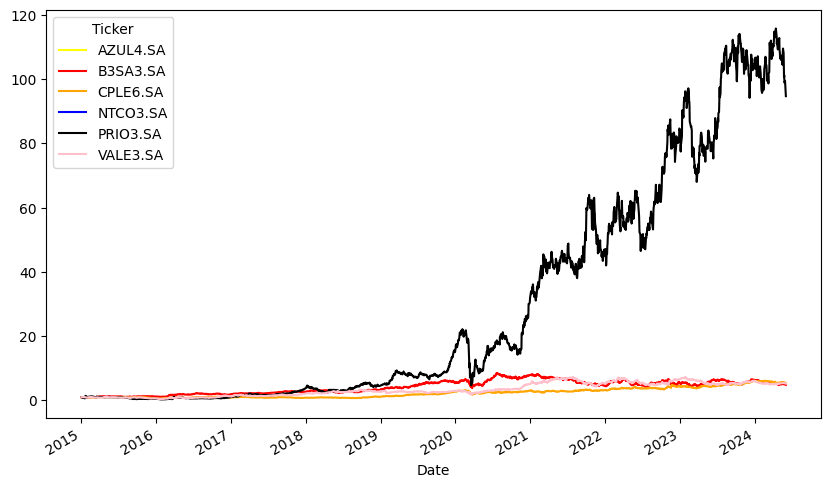

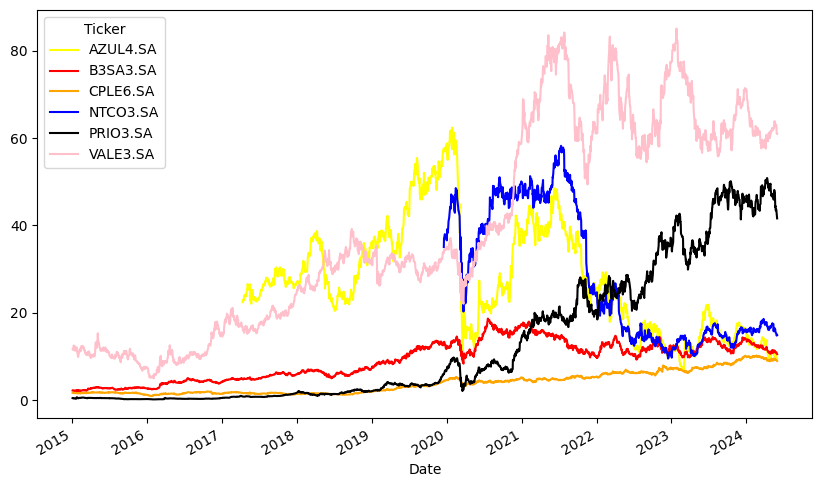

In [8]:
cores = ['yellow', 'red', 'orange', 'blue','black','pink']

(precos/precos.iloc[0]).plot(figsize=(10,6), color=cores)


precos.plot(figsize=(10,6), color=cores)

In [9]:
retornos=precos.pct_change()
retornos=retornos.dropna()
retornos

Ticker,AZUL4.SA,B3SA3.SA,CPLE6.SA,NTCO3.SA,PRIO3.SA,VALE3.SA
Date,,,,,,
2019-12-19 00:00:00+00:00,0.001736,0.000000,0.035940,0.056855,0.012829,0.009912
2019-12-20 00:00:00+00:00,-0.012303,0.011120,0.013935,0.004891,0.030333,0.014630
2019-12-23 00:00:00+00:00,0.010526,-0.045418,-0.007015,0.020748,0.077321,-0.003833
2019-12-26 00:00:00+00:00,-0.009201,-0.004694,-0.000196,-0.010289,0.031231,0.003848
2019-12-27 00:00:00+00:00,0.012791,-0.052304,0.008224,-0.014051,-0.012813,0.004204
...,...,...,...,...,...,...
2024-05-24 00:00:00+00:00,0.051777,0.002700,-0.010638,-0.009622,-0.022937,0.000461
2024-05-27 00:00:00+00:00,-0.023166,-0.003591,0.000000,-0.010363,0.005063,0.003381
2024-05-28 00:00:00+00:00,-0.048419,-0.002703,0.001075,-0.029450,-0.011678,-0.021593


In [10]:
##Estimar assimetria:

desvios=retornos-retornos.mean()
desvio_padrao=retornos.std()
desvio_padrao_anualizado=desvio_padrao*np.sqrt(252)
print(desvio_padrao_anualizado)


Ticker
AZUL4.SA    0.786957
B3SA3.SA    0.428411
CPLE6.SA    0.356183
NTCO3.SA    0.553429
PRIO3.SA    0.655033
VALE3.SA    0.389001
dtype: float64


In [11]:
## Estatisticas Descritivas:

stat=scs.describe(retornos)
Coluna=rotulos
Linhas=['Minimo', 'Maximo', 'Media', 'Variancia', 'Desvio-Padrao']
minimo=stat[1][0]
maximo=stat[1][1]
media=stat[2]*252
variancia=stat[3]
desvio_padrao=variancia**(1/2)*np.sqrt(252)
estatistica=[minimo, maximo, media, variancia, desvio_padrao]
df=pd.DataFrame(data=estatistica, index=Linhas, columns=Coluna)
df

,Vale,B3,COpel,GRUPO NATURA,AZUL,PRIO
Minimo,-0.368677,-0.161204,-0.154991,-0.242424,-0.365406,-0.151984
Maximo,0.379834,0.192446,0.220670,0.171765,0.322877,0.213579
Media,-0.098812,0.040075,0.231777,-0.041094,0.665092,0.210423
Variancia,0.002458,0.000728,0.000503,0.001215,0.001703,0.000600
Desvio-Padrao,0.786957,0.428411,0.356183,0.553429,0.655033,0.389001


In [12]:
##Estimar o retorno esperado:
t=rotulos
E_R=retornos.mean()*252
VAR=retornos.var()*252
VOL=desvio_padrao_anualizado

##  Estimar a Matriz de Covariancia:

matriz_cov=retornos.cov()*252
matriz_cov

Ticker,AZUL4.SA,B3SA3.SA,CPLE6.SA,NTCO3.SA,PRIO3.SA,VALE3.SA
Ticker,,,,,,
AZUL4.SA,0.619301,0.179631,0.118922,0.208163,0.211300,0.087345
B3SA3.SA,0.179631,0.183536,0.071764,0.113589,0.107633,0.056027
CPLE6.SA,0.118922,0.071764,0.126866,0.075953,0.089351,0.044436
NTCO3.SA,0.208163,0.113589,0.075953,0.306284,0.111939,0.059306
PRIO3.SA,0.211300,0.107633,0.089351,0.111939,0.429068,0.112926
VALE3.SA,0.087345,0.056027,0.044436,0.059306,0.112926,0.151322


In [13]:
## Esstimar a Matriz de Correlação:

matriz_corr=retornos.corr()
matriz_corr

Ticker,AZUL4.SA,B3SA3.SA,CPLE6.SA,NTCO3.SA,PRIO3.SA,VALE3.SA
Ticker,,,,,,
AZUL4.SA,1.000000,0.532807,0.424266,0.477959,0.409907,0.285323
B3SA3.SA,0.532807,1.000000,0.470295,0.479085,0.383550,0.336191
CPLE6.SA,0.424266,0.470295,1.000000,0.385309,0.382969,0.320706
NTCO3.SA,0.477959,0.479085,0.385309,1.000000,0.308786,0.275476
PRIO3.SA,0.409907,0.383550,0.382969,0.308786,1.000000,0.443180
VALE3.SA,0.285323,0.336191,0.320706,0.275476,0.443180,1.000000


In [14]:
RF = yf.download("SELIC.BK", inicio, final)['Adj Close']
RF

[*********************100%***********************]  1 of 1 completed


Ticker,SELIC.BK
Date,
2016-10-18 00:00:00+00:00,2.145669
2016-10-19 00:00:00+00:00,2.029972
2016-10-20 00:00:00+00:00,2.072043
2016-10-21 00:00:00+00:00,2.072043
2016-10-25 00:00:00+00:00,2.082561
...,...
2024-05-27 00:00:00+00:00,3.320000
2024-05-28 00:00:00+00:00,3.240000
2024-05-29 00:00:00+00:00,3.200000


In [15]:
retornosrf = RF.pct_change().apply(lambda x: np.log(1+x)).dropna()
media_retornosrf = retornosrf.mean()
matriz_covrf = retornosrf.cov()
media_retornosrf

Ticker
SELIC.BK    0.000268
dtype: float64

In [16]:
 rf = (1 + 0.000268)**252- 1
rf

0.06985909382969924

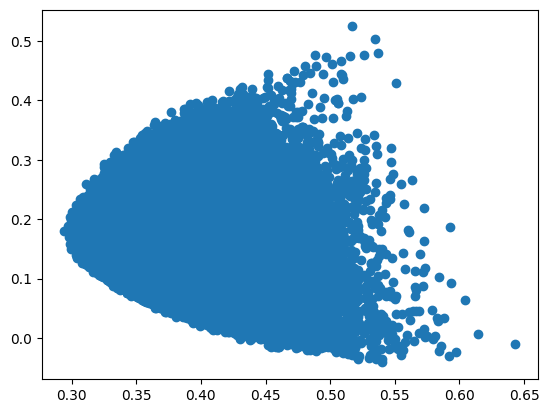

In [17]:
p_ret=[] #retornos portfolio
p_vol=[] #volatilidade ou desvio padrão do portfólio
p_pesos=[] #pesos por ativo no portfólio

noa=len(retornos.columns)
nop=100000 #numero de portfólios "experimentados"

for portfolios in range(nop):
  pesos=np.random.random(noa)
  pesos=pesos/np.sum(pesos)
  p_pesos.append(pesos)
  returns=np.dot(pesos, E_R) #encontra o retorno esperado do portfólio
  p_ret.append(returns)
  var=matriz_cov.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum() #multiplica a matriz covariancia pelos respectivos pesos de cada ativo e soma td ao fim
  dp=np.sqrt(var) #para obter o desvio padrão - np
  p_vol.append(dp)

p_ret=np.array(p_ret)
p_vol=np.array(p_vol)

df_pesos = pd.DataFrame(p_pesos, columns=rotulos)
dados = pd.DataFrame({'Retornos': p_ret, 'Risco': p_vol})
portfolios = pd.concat([dados, df_pesos], axis = 1, join = 'inner')

plt.scatter(portfolios['Risco'], portfolios['Retornos'])

In [18]:
portfolios

,Retornos,Risco,Vale,B3,COpel,GRUPO NATURA,AZUL,PRIO
0,0.054043,0.447248,0.315047,0.195748,0.132360,0.247862,0.074569,0.034413
1,0.096467,0.408843,0.233910,0.186780,0.042747,0.240391,0.109408,0.186765
2,0.246495,0.337372,0.034627,0.130347,0.188235,0.108129,0.202699,0.335964
3,0.029277,0.416552,0.182895,0.228813,0.060313,0.396980,0.028481,0.102517
4,0.154315,0.387911,0.230011,0.047746,0.213710,0.168032,0.133840,0.206661
...,...,...,...,...,...,...,...,...
99995,0.099007,0.386166,0.184622,0.306721,0.088301,0.181881,0.091903,0.146571
99996,0.250294,0.389774,0.031573,0.120425,0.126417,0.290710,0.309166,0.121710
99997,0.149977,0.404121,0.122982,0.110457,0.183559,0.367459,0.186737,0.028806
99998,0.101005,0.411544,0.301587,0.209002,0.365398,0.045255,0.050644,0.028114


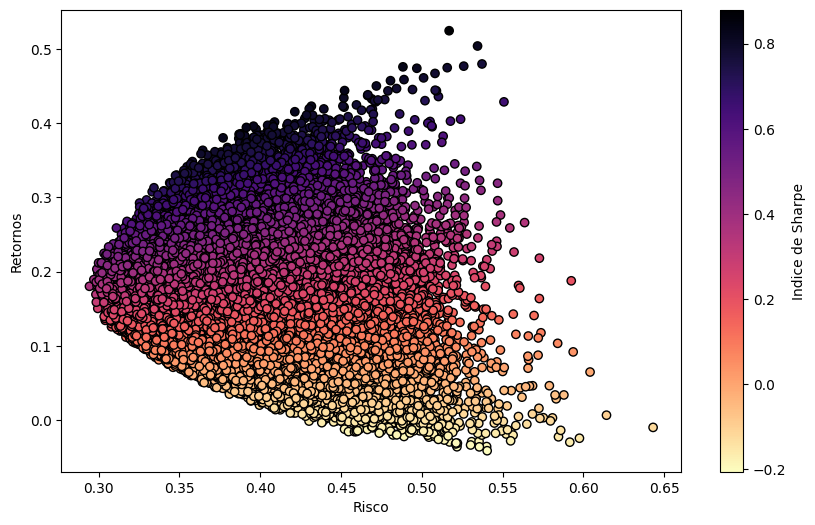

In [40]:
from matplotlib import colormaps


plt.figure(figsize=(10,6))
plt.scatter(p_vol,p_ret,c=(p_ret-rf)/p_vol, marker='o',cmap='magma_r',edgecolors='black')
plt.xlabel('Risco')
plt.ylabel('Retornos')
plt.colorbar(label='Indice de Sharpe')

In [43]:
## Encontrar carteira de menor risco:


min_risco=portfolios[portfolios['Risco']==portfolios['Risco'].min()]
min_risco
'VALE3', 'B3SA3', 'CPLE6', 'NTCO3','AZUL4','PRIO3'
df = pd.DataFrame({'VALE':p_pesos[393][0], 'B3':p_pesos[393][1], 'COPEL':p_pesos[393][2],
                   'NATURA':p_pesos[393][3],'AZUL':p_pesos[393][4],'PRIO':p_pesos[393][5],
                   'Retornos':min_risco['Retornos'], 'Risco':min_risco['Risco']})
df


,VALE,B3,COPEL,NATURA,AZUL,PRIO,Retornos,Risco
33499,0.299663,0.1839,0.320985,0.037033,0.15067,0.00775,0.180255,0.294358


In [21]:
## Funções para estimar risco e retorno do portfolio
def port_ret(pesos):
  return np.sum(E_R*pesos)

def port_vol(pesos):
  return math.sqrt(np.dot(pesos.T,np.dot(matriz_cov,pesos)))

In [22]:
## Estimar Carteira de menor risco global: otimização
restrição = ({"type":'eq','fun':lambda x: np.sum(x)-1})
bdns=tuple((0,1) for x in range(noa))
pesos_i=np.array(noa*[1/noa,])

##Otimizara a carteira:

otim_port=sco.minimize(port_vol, pesos_i, method='SLSQP', bounds=bdns, constraints=restrição)

## Pesos Otimizados:

otim_port['x'].round(3)

## Retorno da carteira de menor risco global:

port_ret(otim_port['x'])

## Risco da carteira de menor risco global:

port_vol(otim_port['x'])

0.2929589767445406

In [23]:
## Máximo Sharpe Ratio:

Sharpe_Ratio = (p_ret - rf)/p_vol
Sharpe_Ratio.max()


np.float64(0.8795326437381212)

In [24]:
## Estimar carteira de Sharpe Maximo:

#Função do sharpe

def min_func_sharpe(pesos):
 return -(port_ret(pesos)-rf)/port_vol(pesos)

#Otimização do Sharpe:

otim_sharpe=sco.minimize(min_func_sharpe,pesos_i,method='SLSQP',bounds=bdns, constraints=restrição)

#pesos otimizados:
otim_sharpe['x'].round(3)

#retorno carteira:
port_ret(otim_sharpe['x'])

#risco carteira:
port_vol(otim_port['x'])

#maximo sharpe:
(port_ret(otim_sharpe['x'])-rf)/port_vol(otim_sharpe['x'])



np.float64(0.9160031804893166)

In [25]:
retorno_carteira = port_ret(otim_sharpe['x'])
risco_carteira = port_vol(otim_sharpe['x'])

print("Retorno da carteira otimizada:", retorno_carteira)
print("Risco da carteira otimizada:", risco_carteira)


Retorno da carteira otimizada: 0.5738654785039226
Risco da carteira otimizada: 0.5502234003215905


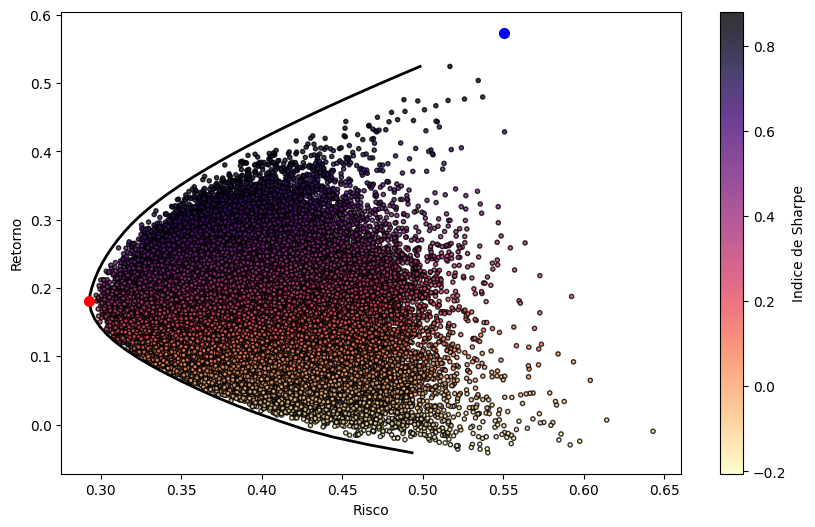

In [61]:
# Fronteira Eficiente Markowitz:

cons = ({'type': 'eq', 'fun':lambda x: port_ret(x) - tret},{'type': 'eq', 'fun':lambda x: np.sum(x)-1})
bnds =tuple((0,1) for x in pesos)
trets=np.linspace(p_ret.min(), p_ret.max(), 50)

t_vols=[]

for tret in trets:
  restrição = sco.minimize(port_vol, pesos_i, method='SLSQP', bounds=bnds, constraints=cons)
  t_vols.append(restrição['fun'])

t_vols=np.array(t_vols)
t_vols

#Grafico Função Fronteira Eficiente:

plt.figure(figsize=(10,6))
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker=".", alpha=0.8, cmap='magma_r', edgecolors='black')
plt.plot(t_vols, trets,'Black', lw=2.0)
plt.plot(port_vol(otim_sharpe['x']),port_ret(otim_sharpe['x']),'bo',markersize=7.0)
plt.plot(port_vol(otim_port['x']), port_ret(otim_port['x']), 'ro', markersize=7.0)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de Sharpe')

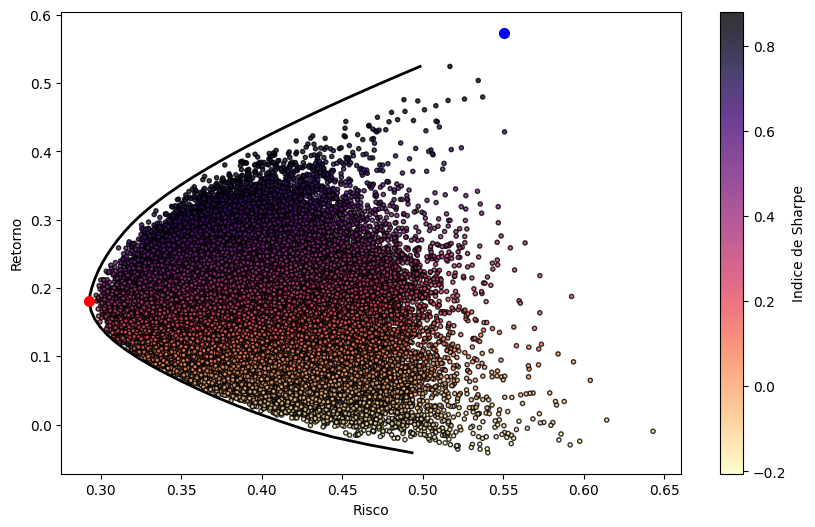

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='.', alpha=0.8, cmap='magma_r', edgecolors='black')
plt.plot(t_vols, trets,'black', lw=2.0)
plt.plot(port_vol(otim_sharpe['x']),port_ret(otim_sharpe['x']),'bo',markersize=7.0)
plt.plot(port_vol(otim_port['x']), port_ret(otim_port['x']), 'ro', markersize=7.0)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de Sharpe')

In [28]:
# Linha de Alocação de Capital:

eixo_x=[]
eixo_y=[]
utility=[]

a=10 #nivel de aversão ao risco

for er in np.linspace(rf, max(trets), 20):
  sd = (er - rf)/((port_ret(otim_sharpe['x'])-rf)/port_vol(otim_sharpe['x']))
  utilidade = er - 0.5*a*(sd**2)
  eixo_x.append(sd)
  eixo_y.append(er)
  utility.append(utilidade)

dataER = {'Utilidade': utility, 'Retorno':eixo_y, 'Risco':eixo_x}
ER=pd.DataFrame(dataER)

ER


,Utilidade,Retorno,Risco
0,0.069859,0.069859,0.000000
1,0.090375,0.093787,0.026122
2,0.104067,0.117714,0.052243
3,0.110936,0.141641,0.078365
4,0.110982,0.165569,0.104486
5,0.104204,0.189496,0.130608
6,0.090603,0.213424,0.156729
7,0.070179,0.237351,0.182851
8,0.042931,0.261278,0.208972
9,0.008860,0.285206,0.235094


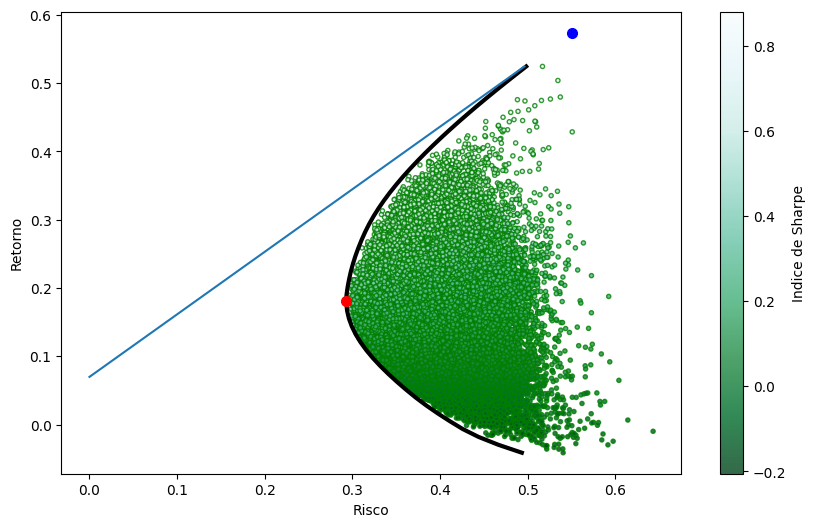

In [29]:
#Grafico da Fronteira eficiente com Capital Location Line

plt.figure(figsize=(10,6))
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='.', alpha=0.8, cmap='BuGn_r', edgecolors='green')
plt.plot(t_vols, trets,'black', lw=3.0)
plt.plot(port_vol(otim_sharpe['x']),port_ret(otim_sharpe['x']),'bo',markersize=7.0)
plt.plot(port_vol(otim_port['x']), port_ret(otim_port['x']), 'ro', markersize=7.0)
plt.plot(eixo_x, eixo_y)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de Sharpe')

In [30]:
ibov_data = yf.download('^BVSP', inicio, final )['Close']

ibov_returns = ibov_data.pct_change().dropna()

ibov_mean_return = ibov_returns.mean()

ibov_variance = ibov_returns.var()
ibov_variance_percentage = ibov_variance * 100

ibov_mean_return_anualizado = ibov_mean_return * 252

ibov_variance_anualizada = ibov_variance * 252

print("\nFechamentos IBOV:")
print(ibov_data)

print("\nRetornos do IBOV:")
print(ibov_returns)
for ibov_mean_return_anualizado,ibov_variance_anualizada in zip(ibov_mean_return_anualizado,ibov_variance_anualizada,):
 print("\nRetorno Médio Anualizado do IBOV: {:.3}".format(ibov_mean_return_anualizado))

 print("\nVariância Anualizada do IBOV: {:.2f} %".format(ibov_variance_anualizada))

   


[*********************100%***********************]  1 of 1 completed


Fechamentos IBOV:
Ticker                        ^BVSP
Date                               
2015-01-02 00:00:00+00:00   48512.0
2015-01-05 00:00:00+00:00   47517.0
2015-01-06 00:00:00+00:00   48001.0
2015-01-07 00:00:00+00:00   49463.0
2015-01-08 00:00:00+00:00   49943.0
...                             ...
2024-05-24 00:00:00+00:00  124306.0
2024-05-27 00:00:00+00:00  124496.0
2024-05-28 00:00:00+00:00  123780.0
2024-05-29 00:00:00+00:00  122707.0
2024-05-31 00:00:00+00:00  122098.0

[2332 rows x 1 columns]

Retornos do IBOV:
Ticker                        ^BVSP
Date                               
2015-01-05 00:00:00+00:00 -0.020510
2015-01-06 00:00:00+00:00  0.010186
2015-01-07 00:00:00+00:00  0.030458
2015-01-08 00:00:00+00:00  0.009704
2015-01-09 00:00:00+00:00 -0.022085
...                             ...
2024-05-24 00:00:00+00:00 -0.003391
2024-05-27 00:00:00+00:00  0.001528
2024-05-28 00:00:00+00:00 -0.005751
2024-05-29 00:00:00+00:00 -0.008669
2024-05-31 00:00:00+00:00 -0.004963



In [31]:
dados_ibov = yf.download('^BVSP', inicio, final)['Close']
retornos_ibov = dados_ibov.pct_change().dropna()

dados_ativos = yf.download(tickers, inicio, final)['Close']
retornos_ativos = dados_ativos.pct_change().dropna()

betas = {}

common_index = retornos_ibov.index.intersection(retornos_ativos.index)
retornos_ibov = retornos_ibov.reindex(common_index).squeeze()
retornos_ativos = retornos_ativos.reindex(common_index)

for ativo in retornos_ativos.columns:
    if len(retornos_ibov) == len(retornos_ativos[ativo]):
     regressao = linregress(retornos_ibov, retornos_ativos[ativo].values)
     betas[ativo] = regressao.slope

for ativo, beta in betas.items():
    print(f'Beta de {ativo}: {beta:.2f}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed

Beta de AZUL4.SA: 1.92
Beta de B3SA3.SA: 1.16
Beta de CPLE6.SA: 0.87
Beta de NTCO3.SA: 1.23
Beta de PRIO3.SA: 1.46
Beta de VALE3.SA: 0.91


In [32]:
risk_systematic = {}

# Calcular o risco sistemático
ibov_variance_scalar = float(ibov_variance.iloc[0]) if isinstance(ibov_variance, pd.Series) else float(ibov_variance)

for ativo, beta in betas.items():
    risk_systematic[ativo] = float(beta) * ibov_variance_scalar * 252

# Exibir os resultados
for ativo, risco_sistematico in risk_systematic.items():
    print(f"Risco Sistemático de {ativo}: {risco_sistematico * 100:.4f} %")

Risco Sistemático de AZUL4.SA: 11.5346 %
Risco Sistemático de B3SA3.SA: 6.9847 %
Risco Sistemático de CPLE6.SA: 5.2217 %
Risco Sistemático de NTCO3.SA: 7.3544 %
Risco Sistemático de PRIO3.SA: 8.7656 %
Risco Sistemático de VALE3.SA: 5.4896 %


In [33]:
expected_returns = {}

# Garantir que os valores sejam escalares
ibov_mean_return = float(ibov_returns.mean().iloc[0] * 252) if isinstance(ibov_returns.mean(), pd.Series) else float(ibov_returns.mean() * 252)
rf_scalar = float(rf.iloc[0]) if isinstance(rf, pd.Series) else float(rf)  # Caso rf seja uma Series

# Calcular os retornos esperados
for ativo in retornos_ativos.columns:
    beta = float(betas[ativo])  # Garantir que beta seja escalar
    expected_return = rf_scalar + beta * (ibov_mean_return - rf_scalar)
    expected_returns[ativo] = expected_return

# Exibir os resultados
for ativo, retorno_esperado in expected_returns.items():
    print(f"Retorno Esperado de {ativo}: {retorno_esperado * 100:.4f} %")

Retorno Esperado de AZUL4.SA: 18.5538 %
Retorno Esperado de B3SA3.SA: 13.9908 %
Retorno Esperado de CPLE6.SA: 12.2227 %
Retorno Esperado de NTCO3.SA: 14.3615 %
Retorno Esperado de PRIO3.SA: 15.7767 %
Retorno Esperado de VALE3.SA: 12.4913 %


In [34]:
cov_Azul_ibov = retornos_ativos['AZUL4.SA'].cov(retornos_ibov)
cov_Azul_ibov_anualizada = cov_Azul_ibov * 252
cov_Azul_ibov_anualizada_percent = cov_Azul_ibov_anualizada * 100
cov_Azul_ibov_anualizada_percent_formatted = "{:.6f} %".format(cov_Azul_ibov_anualizada_percent)

correlacao_Azul_IBOV = retornos_ativos['AZUL4.SA'].corr(retornos_ibov)

print("Covariância anualizada entre AZUL4 e o IBOVESPA:", cov_Azul_ibov_anualizada_percent_formatted)
print("Correlação entre AZUL4 e IBOV: {:.4f}".format(correlacao_Azul_IBOV))

Covariância anualizada entre AZUL4 e o IBOVESPA: 13.969044 %
Correlação entre AZUL4 e IBOV: 0.6584


In [35]:
print(f"Tamanhos: p_vol={len(p_vol)}, p_ret={len(p_ret)}, Índice de Sharpe={(p_ret - rf).size}")


Tamanhos: p_vol=100000, p_ret=100000, Índice de Sharpe=100000
